In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
import seaborn as sns
#from pylab import rcParams
plt.rcParams['figure.figsize'] = 20, 5
import warnings
warnings.filterwarnings('ignore')
from scipy.special import boxcox1p
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox_normmax

In [2]:
train1 = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

In [3]:
train = train1.copy()
test = test1.copy()

In [4]:
test_ID = test["Id"]

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
train.isnull().sum() / train.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [10]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
test[test["BsmtQual"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
125,1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
387,1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
388,1849,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal
396,1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
397,1858,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1114,1114,0,2228,0.0,0.0,2,0,6,2,TA,8,Typ,0,NaN,Detchd,1979.0,Unf,2.0,720.0,TA,TA,Y,73,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca
398,1859,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,

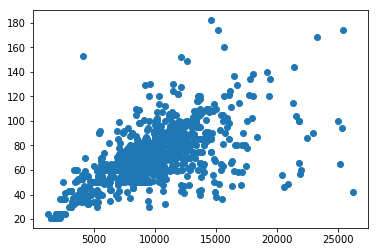

In [12]:
plt.scatter(train[(train["LotArea"]<30000) & (train["LotFrontage"]<200)]["LotArea"],train[(train["LotArea"]<30000) & (train["LotFrontage"]<200)]["LotFrontage"])


In [13]:
train["train"] = 1
test["train"] = 0

In [14]:
full = pd.concat([train,test],axis=0,sort=False)

In [15]:
full.shape

(2919, 82)

In [16]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


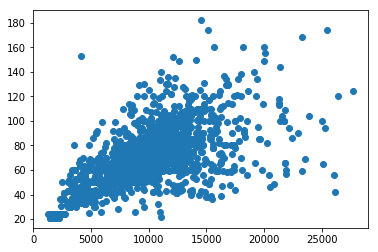

In [17]:
plt.scatter(full[(full["LotArea"]<30000) & (full["LotFrontage"]<200)]["LotArea"],full[(full["LotArea"]<30000) & (full["LotFrontage"]<200)]["LotFrontage"])


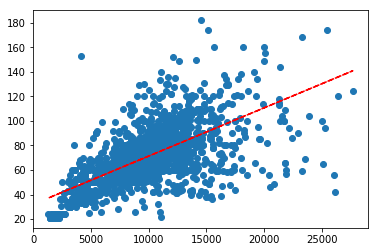

In [18]:
import pylab
# plot the data itself
x = full[(full["LotArea"]<30000) & (full["LotFrontage"]<200)]["LotArea"].values
y = full[(full["LotArea"]<30000) & (full["LotFrontage"]<200)]["LotFrontage"].values
pylab.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(pd.DataFrame(x),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lm.coef_

array([0.00392383])

In [24]:
full[full["LotFrontage"].isnull()]["LotArea"]

7        10382
12       12968
14       10920
16       11241
24        8246
31        8544
42        9180
43        9200
50       13869
64        9375
66       19900
76        8475
84        8530
95        9765
100      10603
104       7758
111       7750
113      21000
116      11616
120      21453
126       4928
131      12224
133       6853
136      10355
147       9505
149       6240
152      14803
153      13500
160      11120
166      10708
169      16669
170      12358
177      13650
180       2117
186       9947
191       7472
203       4438
207      12493
208      14364
214      10900
218      15660
221       8068
234       7851
237       9453
244       8880
249     159000
269       7917
287       8125
288       9819
293      16659
307       7920
308      12342
310       7685
319      14115
328      11888
330      10624
335     164660
342       8544
346      12772
347      17600
351       5271
356       9248
360       7540
361       9144
364      18800
366       9500
369       

In [25]:
full[full["LotFrontage"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,1
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0,1
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0,1
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0,1
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0,1
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1228.0,1228.0,GasA,Gd,Y,SBrkr,1228,0,0,1228,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1.0,271.0,TA,TA,Y,0,65,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350.0,1
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747.0,LwQ,93.0,0.0,840.0,GasA,Gd,Y,SBrkr,884,0,0,884,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2.0,504.0,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000.0,1
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280.0,BLQ,491.0,167.0,938.0,GasA,TA,Y,SBrkr,938,0,0,938,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1.0,308.0,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250.0,1
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182.0,Unf,0.0,612.0,794.0,GasA,Gd,Y,SBrkr,794,676,0,1470,0.0,1.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2.0,388.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000.0,1
64,65,60,RL,Na

In [26]:
full.loc[full["LotFrontage"].isnull(),"LotFrontage"]= lm.predict(pd.DataFrame(full[full["LotFrontage"].isnull()]["LotArea"]))


In [27]:
full[full["LotFrontage"].isnull()]["LotFrontage"]

Series([], Name: LotFrontage, dtype: float64)

In [28]:
full[full["MSZoning"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
455,1916,30,NaN,109.000000,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN,0
756,2217,20,NaN,80.000000,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN,0
790,2251,70,NaN,254.218207,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN,0
1444,2905,20,NaN,125.000000,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN,0


In [29]:
full["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [30]:
full['MSZoning'] = full['MSZoning'].fillna(full['MSZoning'].mode()[0])

In [31]:
full["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
#Basement Quality

In [33]:
full[full["Exterior1st"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN,0


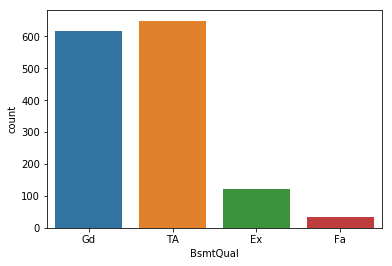

In [34]:
#count of instances
sns.countplot(x="BsmtQual",data=train)

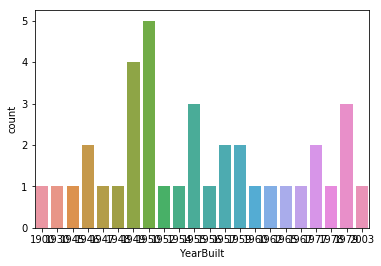

In [35]:
sns.countplot(x=train[train["BsmtQual"].isnull()]["YearBuilt"])

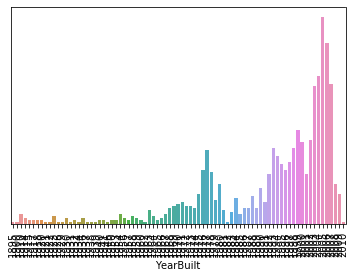

In [36]:
ax = sns.countplot(x=full[full["BsmtQual"]=="Gd"]["YearBuilt"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.get_yaxis().set_visible(False)

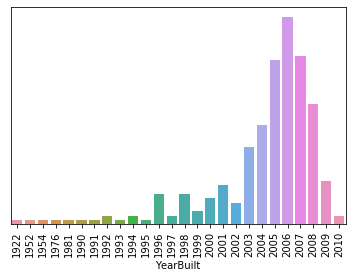

In [37]:
ax = sns.countplot(x=full[full["BsmtQual"]=="Ex"]["YearBuilt"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.get_yaxis().set_visible(False)

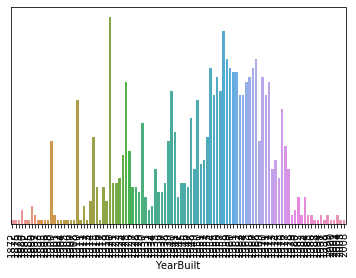

In [38]:
ax = sns.countplot(x=full[full["BsmtQual"]=="TA"]["YearBuilt"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.get_yaxis().set_visible(False)

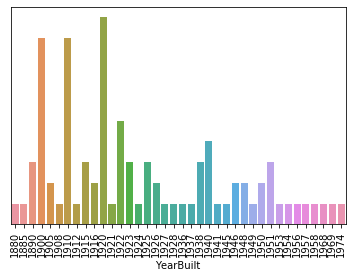

In [39]:
ax = sns.countplot(x=full[full["BsmtQual"]=="Fa"]["YearBuilt"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.get_yaxis().set_visible(False)

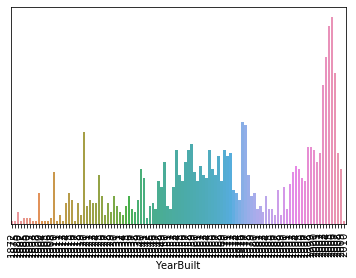

In [40]:
ax = sns.countplot(x=train["YearBuilt"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.get_yaxis().set_visible(False)

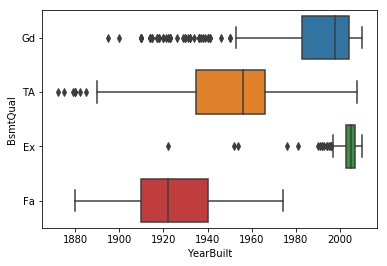

In [41]:
sns.boxplot(full["YearBuilt"],full["BsmtQual"])

In [42]:
full[full["BsmtQual"].isnull()].shape

(81, 82)

In [43]:
train["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
1990     15
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, dtype: int64

In [44]:
train[train["BsmtQual"].isnull()]["YearBuilt"]

17      1967
39      1955
90      1950
102     1979
156     1950
182     1957
259     1956
342     1949
362     2003
371     1959
392     1959
520     1900
532     1955
533     1946
553     1949
646     1950
705     1930
736     1950
749     1945
778     1977
868     1948
894     1979
897     1979
984     1977
1000    1952
1011    1965
1035    1957
1045    1955
1048    1960
1049    1946
1090    1950
1179    1954
1216    1978
1218    1947
1232    1962
1321    1949
1412    1949
Name: YearBuilt, dtype: int64

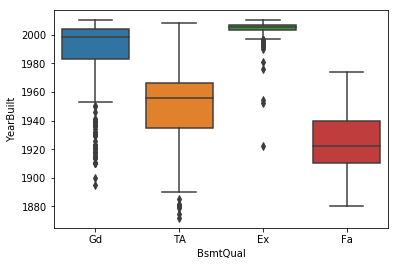

In [45]:
sns.boxplot(full["BsmtQual"],full["YearBuilt"])

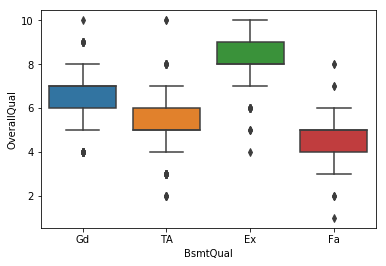

In [46]:
sns.boxplot(full["BsmtQual"],full["OverallQual"])

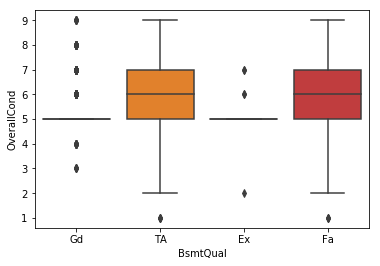

In [47]:
sns.boxplot(full["BsmtQual"],full["OverallCond"])

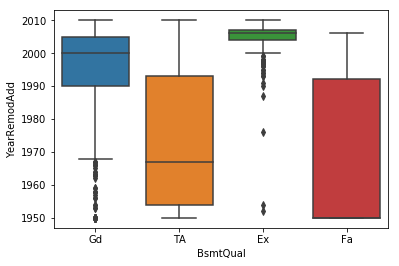

In [48]:
sns.boxplot(full["BsmtQual"],full["YearRemodAdd"])

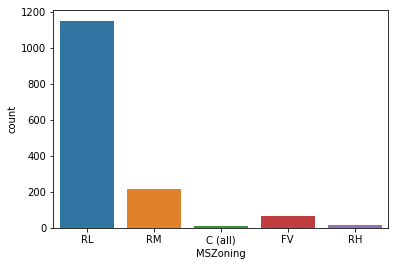

In [49]:
sns.countplot(x="MSZoning",data=train)

In [50]:
full.groupby(["YearBuilt"])["BsmtQual"].agg(lambda x:x.value_counts().index[0])

YearBuilt
1872    TA
1875    TA
1879    TA
1880    TA
1882    TA
1885    TA
1890    TA
1892    TA
1893    TA
1895    TA
1896    TA
1898    TA
1900    TA
1901    TA
1902    TA
1904    TA
1905    Fa
1906    TA
1907    TA
1908    TA
1910    TA
1911    TA
1912    TA
1913    TA
1914    TA
1915    TA
1916    TA
1917    Gd
1918    TA
1919    TA
1920    TA
1921    TA
1922    TA
1923    TA
1924    TA
1925    TA
1926    TA
1927    TA
1928    TA
1929    TA
1930    TA
1931    TA
1932    TA
1934    TA
1935    TA
1936    TA
1937    TA
1938    TA
1939    TA
1940    TA
1941    TA
1942    TA
1945    TA
1946    TA
1947    TA
1948    TA
1949    TA
1950    TA
1951    TA
1952    TA
1953    TA
1954    TA
1955    TA
1956    TA
1957    TA
1958    TA
1959    TA
1960    TA
1961    TA
1962    TA
1963    TA
1964    TA
1965    TA
1966    TA
1967    TA
1968    TA
1969    TA
1970    TA
1971    TA
1972    TA
1973    TA
1974    TA
1975    Gd
1976    Gd
1977    Gd
1978    Gd
1979    Gd
1980    Gd
1981    Gd
1982    TA


In [51]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [52]:
full['BsmtQual'].fillna(full.groupby('YearBuilt')['BsmtQual'].agg(lambda x:x.value_counts().index[0]))



0        Gd
1        Gd
2        Gd
3        TA
4        Gd
5        Gd
6        Ex
7        Gd
8        TA
9        TA
10       TA
11       Ex
12       TA
13       Gd
14       TA
15       TA
16       TA
17      NaN
18       TA
19       TA
20       Ex
21       TA
22       Gd
23       Gd
24       TA
25       Gd
26       TA
27       Ex
28       TA
29       TA
30       TA
31       TA
32       Ex
33       TA
34       Ex
35       Ex
36       Gd
37       TA
38       TA
39      NaN
40       TA
41       TA
42       Gd
43       Gd
44       TA
45       Ex
46       Ex
47       Gd
48       TA
49       TA
50       Gd
51       TA
52       Gd
53       Ex
54       TA
55       TA
56       Gd
57       Gd
58       Ex
59       TA
60       Gd
61       TA
62       Gd
63       TA
64       Gd
65       Ex
66       Gd
67       Gd
68       TA
69       TA
70       Gd
71       TA
72       Gd
73       TA
74       Fa
75       Gd
76       TA
77       TA
78       TA
79       TA
80       Gd
81       Ex
82       Gd
83  

In [53]:
cols_to_drop = ["Alley","PoolQC","Fence","MiscFeature","Utilities"]

In [54]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [55]:
full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
if "Alley" in full.columns:
    full.drop(cols_to_drop,axis=1,inplace=True)

In [57]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual','GarageCond','MasVnrType','Functional','GarageYrBlt'):
    full[col] = full[col].fillna('None')
    

In [58]:
full["GarageYrBlt"] = full["GarageYrBlt"].replace("None",-1)

In [59]:
full["GarageYrBlt"] = full["GarageYrBlt"].astype(int)

In [60]:
full['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [61]:
full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0])

In [62]:
full['BsmtQual'].shape

(2919,)

In [63]:
full.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [64]:
full['Exterior1st'] = full['Exterior1st'].fillna(full['Exterior1st'].mode()[0])
full['Exterior2nd'] = full['Exterior2nd'].fillna(full['Exterior2nd'].mode()[0])
full['BsmtFinSF1'] = full['BsmtFinSF1'].fillna(0)
full['BsmtFinSF2'] = full['BsmtFinSF2'].fillna(0)
full['TotalBsmtSF'] = full['TotalBsmtSF'].fillna(0)
full['BsmtUnfSF'] = full['BsmtUnfSF'].fillna(0)
full['BsmtFullBath'] = full['BsmtFullBath'].fillna(0)
full['BsmtHalfBath'] = full['BsmtHalfBath'].fillna(0)
full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])
full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0])

In [65]:
train.shape

(1460, 82)

In [66]:
test.shape

(1459, 81)

In [67]:
full['MasVnrArea'] = full['MasVnrArea'].fillna(0)
full['GarageCars'] = full['GarageCars'].fillna(0)
full['GarageArea'] = full['GarageArea'].fillna(0)

In [68]:
full['BsmtFullBath'].dtype

dtype('float64')

In [69]:
full['TotalSF'] = full['TotalBsmtSF'] + full['1stFlrSF'] + full['2ndFlrSF']
full['Total_Bathrooms'] = (full['FullBath'] + (0.5 * full['HalfBath']) + full['BsmtFullBath'] + (0.5 * full['BsmtHalfBath']))
full['Total_porch_sf'] = (full['OpenPorchSF'] + full['3SsnPorch'] + full['EnclosedPorch'] + full['ScreenPorch'] + full['WoodDeckSF'])

#Data Exploration and Feature Engg

In [70]:
full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Open

In [71]:
full["Age"] = full["YrSold"] - full["YearBuilt"]
full["Age_Remod"] = full["YrSold"] - full["YearRemodAdd"]
full["Age_Garage"] = full["YrSold"] - full["GarageYrBlt"]

In [72]:
mask = full.Age < 0
full.loc[full.Age<0,"Age"] = 0

In [73]:

full.loc[full["Age"]<0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,TotalSF,Total_Bathrooms,Total_porch_sf,Age,Age_Remod,Age_Garage


In [74]:
full["YrSold"] = full["YrSold"].astype("object")
full["MoSold"] = full["MoSold"].astype("object")
full["MSSubClass"] = full["MSSubClass"].astype("object")

In [75]:
full.loc[full["Age_Garage"]>2000, "Age_Garage"] = -1

In [76]:
full.drop(["YearBuilt","YearRemodAdd","GarageYrBlt"],axis=1,inplace=True)

In [77]:
full["YrSold"].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [78]:
train = full[full['train']==1]
test = full[full['train']==0]

In [79]:
data_num = train.drop(["Id"],axis=1).select_dtypes(include = ['float64', 'int64'])

In [80]:
numeric_cols = data_num.columns

In [82]:
for i in full.drop(["SalePrice","train"],axis=1).columns:
    if (i in numeric_cols) and (skew(full[i])>0.6) and full[i].value_counts().shape[0]>100:
        print(i,skew(full[i]))
        #print(full[i].value_counts())
        full[i] = np.log1p(full[i])
        '''
        sns.distplot(full[i].values,bins=100)
        plt.figure(i)
        sns.distplot(boxcox1p(full[i].values,boxcox_normmax(full[i] + 1)),bins=100)
        plt.figure(i)
        sns.distplot(np.log1p(full[i].values),bins=100)
        plt.figure(i)'''

LotFrontage 7.42767641956709
LotArea 12.822431401556724
MasVnrArea 2.6135921295017983
BsmtFinSF1 1.4252301840932442
BsmtFinSF2 4.146143269564016
BsmtUnfSF 0.9193392331173604
TotalBsmtSF 1.1568941366699765
1stFlrSF 1.4696044169256821
2ndFlrSF 0.8616747488436027
GrLivArea 1.269357688230336
WoodDeckSF 1.8424328111184782
OpenPorchSF 2.5351137294802557
EnclosedPorch 4.003891220540856
ScreenPorch 3.9466937029936977
TotalSF 1.5114787493612882
Total_porch_sf 1.3766490335227752


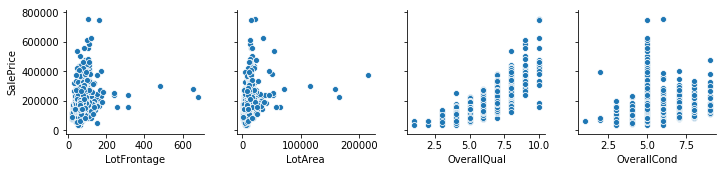

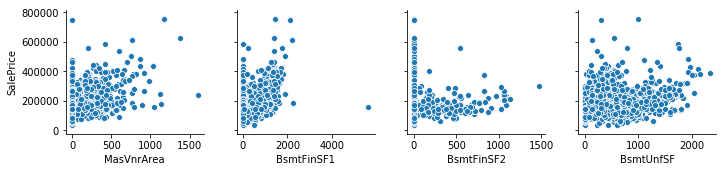

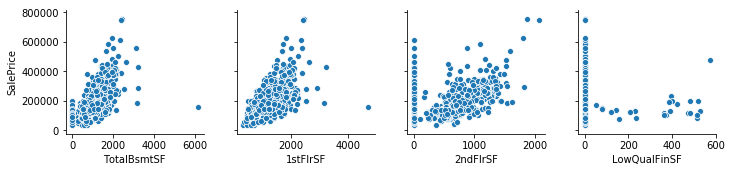

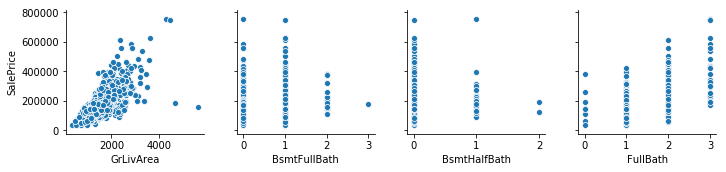

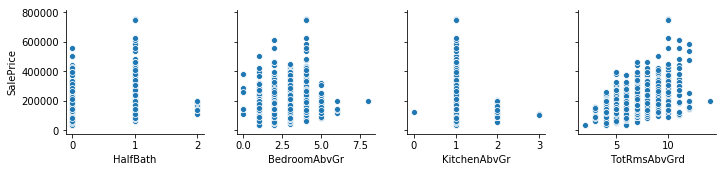

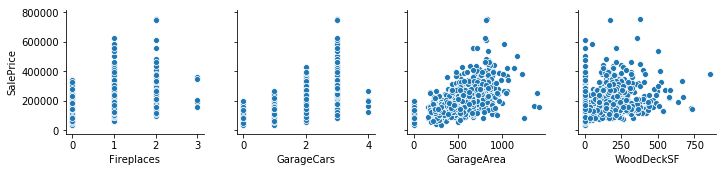

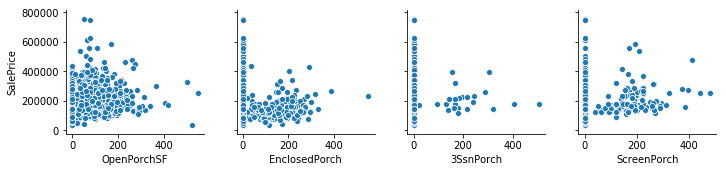

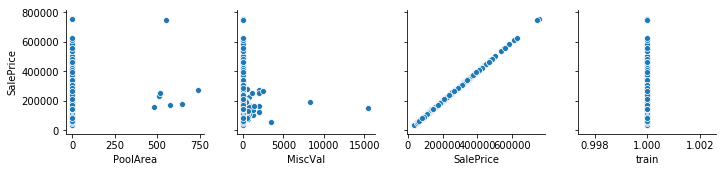

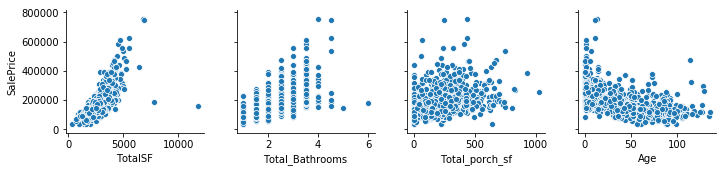

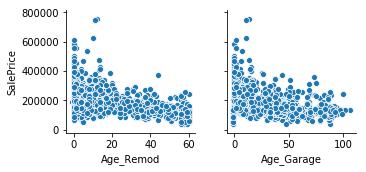

In [83]:
for i in range(0, len(data_num.columns), 4):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+4],
                y_vars=['SalePrice'])

In [84]:
data_obj =  train.drop(["Id"],axis=1).select_dtypes(include = ['object'])

In [85]:
data_obj = data_obj.join(train['SalePrice'])

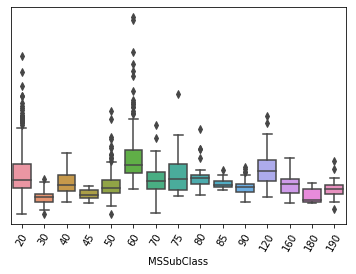

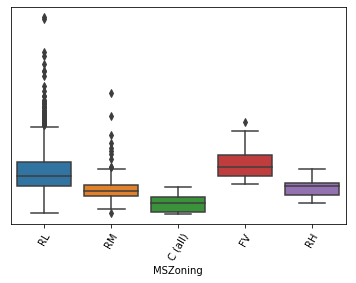

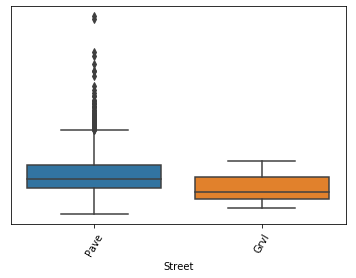

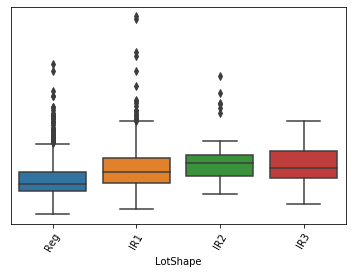

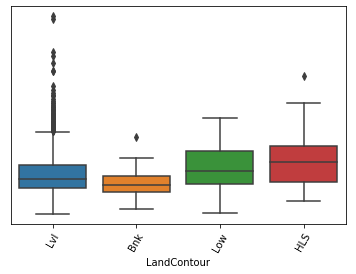

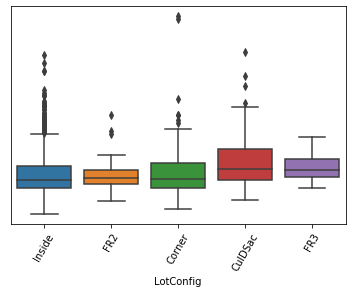

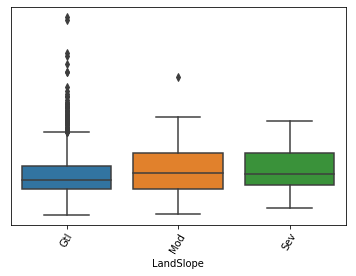

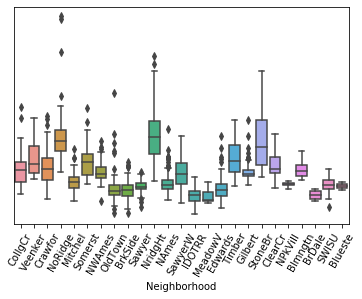

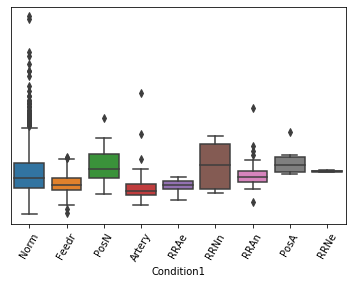

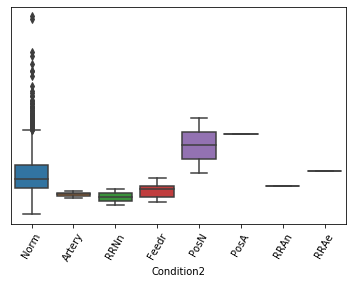

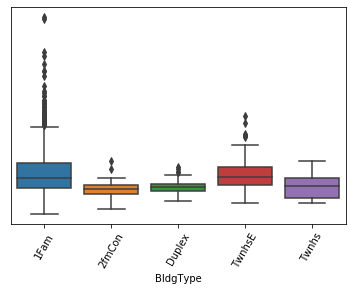

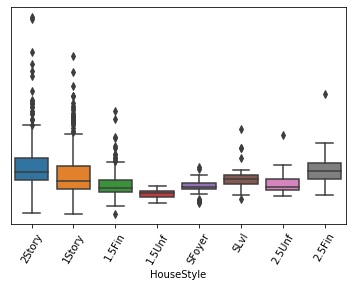

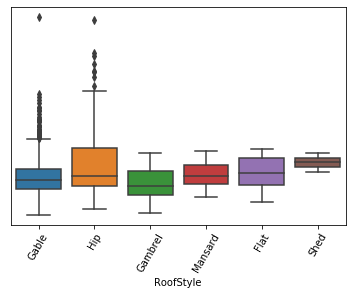

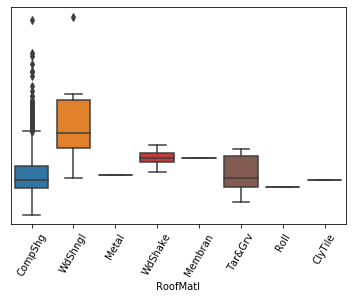

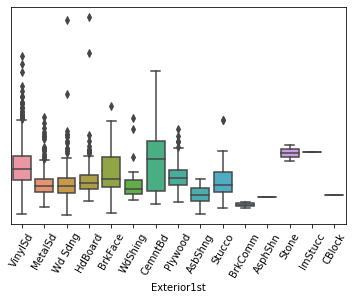

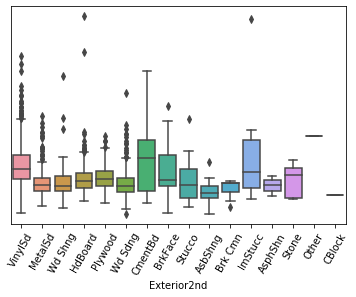

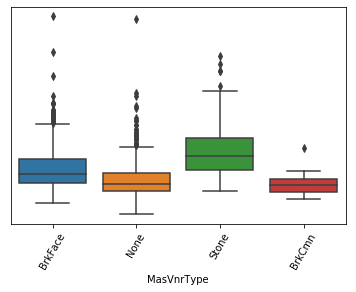

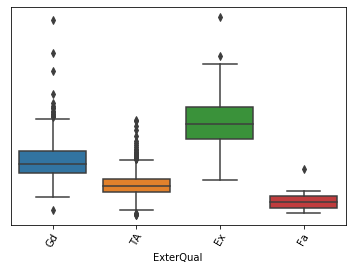

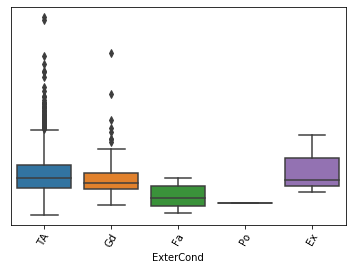

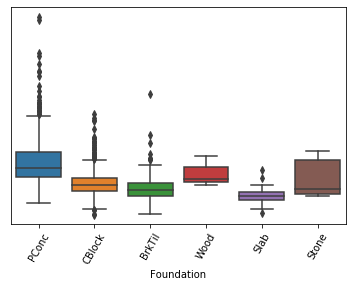

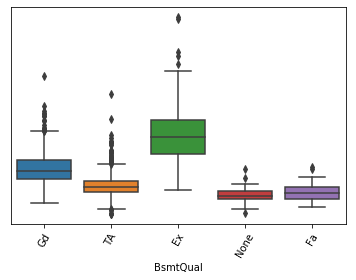

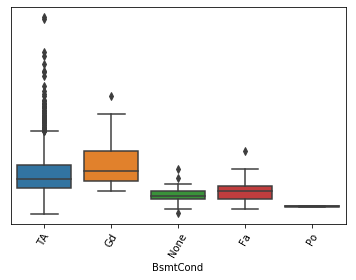

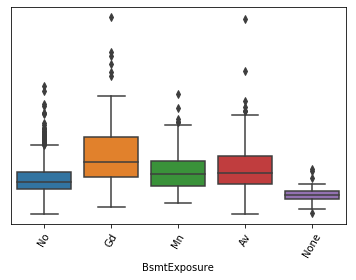

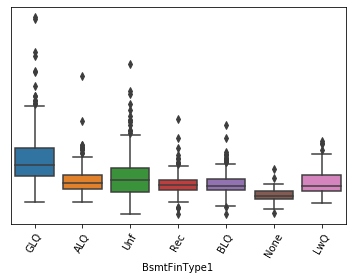

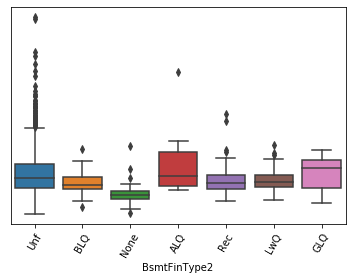

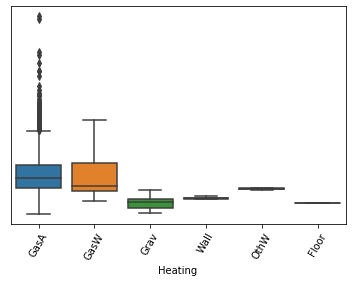

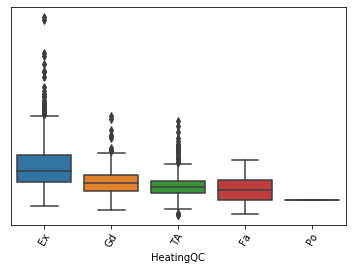

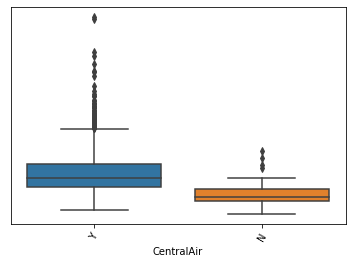

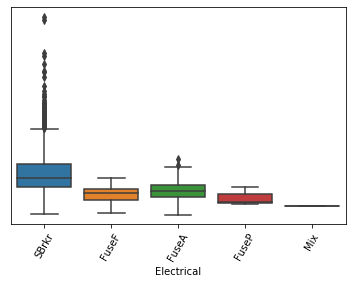

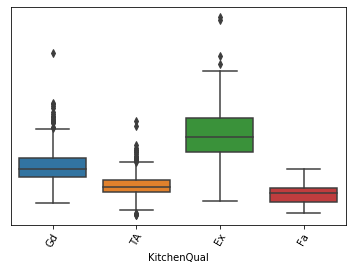

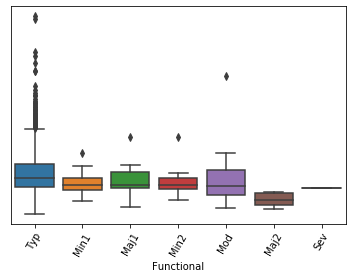

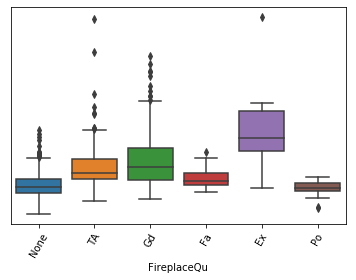

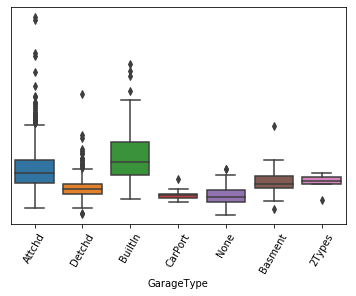

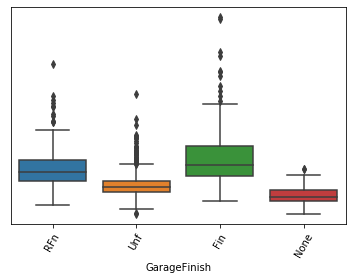

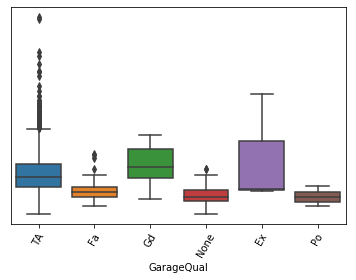

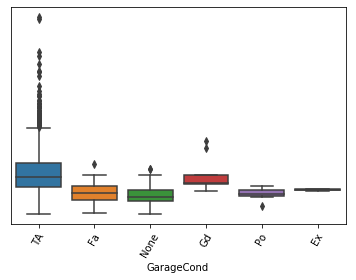

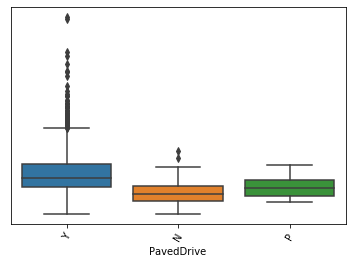

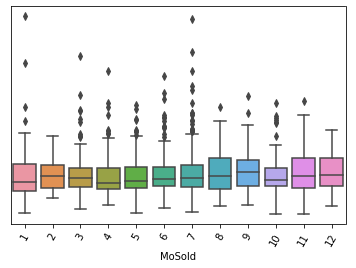

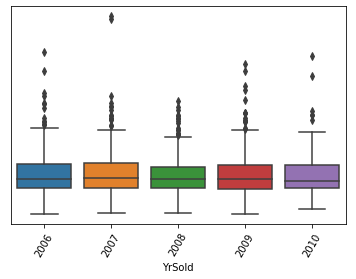

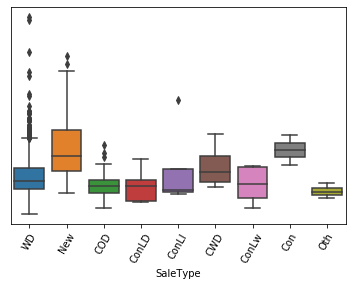

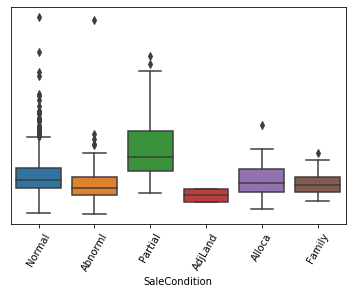

In [86]:
for i in range(0, len(data_obj.drop('SalePrice',axis=1).columns)):
    plt.figure(i)
    ax = sns.boxplot(x = data_obj.columns[i],y = 'SalePrice', data=data_obj)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
    ax.axes.get_yaxis().set_visible(False)

In [87]:
data_obj.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [88]:
#one hot encoding
full = pd.get_dummies(full, columns=data_obj.drop("SalePrice",axis=1).columns)

In [89]:
full.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,train,TotalSF,Total_Bathrooms,Total_porch_sf,Age,Age_Remod,Age_Garage,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,Firep

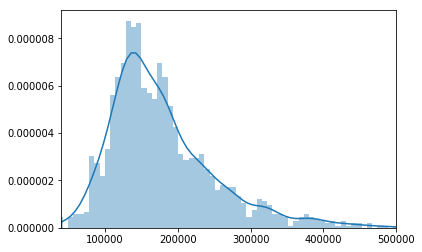

In [90]:
#plotting to see the distribution of visitors 
plt.xlim(40000, 500000)
sns.distplot(train["SalePrice"].values,bins=100)

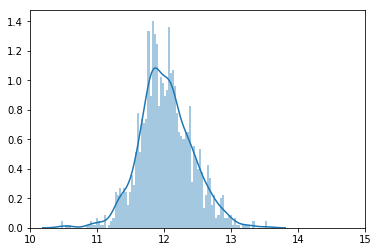

In [91]:
#plotting to see the distribution of visitors 
plt.xlim(10, 15)
sns.distplot(np.log1p(train["SalePrice"].values),bins=100)

In [92]:
skew(np.log1p(train["SalePrice"]))

0.12122191311528363

In [93]:
boxcox_normmax(train["SalePrice"] + 1)

-0.05453787726665998

In [94]:
train = full[full['train']==1]
test = full[full['train']==0]

In [95]:
train.drop("train",axis=1,inplace=True)
test.drop("train",axis=1,inplace=True)

In [98]:
#Modeling and Cross Validation

In [99]:
#this is optimized now
params = {
    'learning_rate':[0.01,0.02],
    'n_estimators':[100,200,300,400,500,550,600,650],
    'num_leaves':[5,6,7,8],
    'boosting_type':['gbdt'],
    'metric':['rmse'],
    'objective':['regression'],
    'max_depth':[5,6,7,8],
    'sub_feature':[0.5,0.6,0.7,0.75,0.8,0.85,0.9],
    'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9],
    'min_child_samples':[6,7,5,10],
    'lambda_l1':[0,1,2,3,4,5,6,7,8,9,10],
    'lambda_l2':[0,1,2,3,4,5,6,7,8,9,10]
}

In [100]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing, metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR 

In [101]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(["Id","SalePrice"],axis=1), train["SalePrice"], test_size=0.3, random_state=42)


In [102]:
clf = lgb.LGBMRegressor()

In [103]:
grid = RandomizedSearchCV(clf,params,verbose=1,cv=5,n_jobs=-1,n_iter=100)

In [157]:
#LightGBM
usable_columns = list(set(train.columns) - set(['Id','SalePrice']))
fold_n=5
folds = KFold(n_splits=fold_n, shuffle=True, random_state=2319)
y_pred_lgb = np.zeros(len(test))
y_pred_train =  np.zeros(len(train))
i = 0
rmse = 0
gridParams = {'subsample': 0.8,'sub_feature': 0.75,'objective': 'regression','num_leaves': 8,'n_estimators': 1000,'min_child_samples': 7,'metric': 'rmse','max_depth': 8,'learning_rate': 0.02,'lambda_l2': 5,'lambda_l1': 0,'boosting_type': 'gbdt'}
for fold_, (train_index, valid_index) in enumerate(folds.split(train.drop(["Id","SalePrice"],axis=1),np.log1p(train["SalePrice"]))):
    print("Fold = {}".format(fold_+1))
    train = pd.DataFrame(train)
    y = pd.DataFrame(np.log1p(train["SalePrice"]))
    
    X_t, y_t = pd.DataFrame(train).iloc[train_index][usable_columns],pd.DataFrame(y).iloc[train_index]
    
    trn_data = lgb.Dataset(X_t, label=y_t)
    val_data = lgb.Dataset(train.iloc[valid_index][usable_columns], label=y.iloc[valid_index])
    
    lgb_model = lgb.train(gridParams, trn_data,valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 10)

    y_pred_train[valid_index] = lgb_model.predict(train.iloc[valid_index][usable_columns].values,num_iteration=lgb_model.best_iteration)
    
    y_actuals_lgb = y.iloc[valid_index]
    rmse += np.round(np.sqrt(metrics.mean_squared_error(y_actuals_lgb,y_pred_train[valid_index])),4)
    print("RMSE = ", rmse)
    
    y_pred_lgb += lgb_model.predict(test[usable_columns], num_iteration=lgb_model.best_iteration)/fold_n
print("Mean RMSE = ", rmse/5)
#13066 0.12762  
result=pd.DataFrame({'Id':test_ID, 'SalePrice':np.expm1(y_pred_lgb)})
result.to_csv("submission.csv",index=False)

Fold = 1
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[556]	training's rmse: 0.0806154	valid_1's rmse: 0.134362
RMSE =  0.1344
Fold = 2
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[574]	training's rmse: 0.076791	valid_1's rmse: 0.137985
RMSE =  0.2724
Fold = 3
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[203]	training's rmse: 0.111604	valid_1's rmse: 0.139248
RMSE =  0.41159999999999997
Fold = 4
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[634]	training's rmse: 0.0756804	valid_1's rmse: 0.12622
RMSE =  0.5378
Fold = 5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[373]	training's rmse: 0.0905188	valid_1's rmse: 0.11714
RMSE =  0.6548999999999999
Mean RMSE =  0.13097999999999999


In [159]:
#Linear Regression
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, Ridge, SGDRegressor

In [160]:
#LassoRegression
usable_columns = list(set(train.columns) - set(['Id','SalePrice']))
clf = Lasso(alpha=0.0005)
clf.fit(train[usable_columns],np.log1p(train["SalePrice"]))
y_train_lasso = np.expm1(clf.predict(train[usable_columns]))
y_pred_lasso = np.expm1(clf.predict(test[usable_columns]))
print(np.round(np.sqrt(metrics.mean_squared_error(np.log1p(train["SalePrice"]),np.log1p(y_train_lasso))),4))
result=pd.DataFrame({'Id':test_ID, 'SalePrice':y_pred_lasso})
result.to_csv("submission.csv",index=False)

0.1033


In [161]:
#RidgeRegression
clf = Ridge(alpha=60)
clf.fit(train[usable_columns],np.log1p(train["SalePrice"]))
y_train_ridge = np.expm1(clf.predict(train[usable_columns]))
y_pred_ridge = np.expm1(clf.predict(test[usable_columns]))
print(np.round(np.sqrt(metrics.mean_squared_error(np.log1p(train["SalePrice"]),np.log1p(y_train_ridge))),4))
result=pd.DataFrame({'Id':test_ID, 'SalePrice':y_pred_ridge})
result.to_csv("submission.csv",index=False)

0.1162


In [162]:
#Elastic Net
clf = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
clf.fit(train[usable_columns],np.log1p(train["SalePrice"]))
y_train_EN = np.expm1(clf.predict(train[usable_columns]))
y_pred_EN = np.expm1(clf.predict(test[usable_columns]))
print(np.round(np.sqrt(metrics.mean_squared_error(np.log1p(train["SalePrice"]),np.log1p(y_train_EN))),4))
result=pd.DataFrame({'Id':test_ID, 'SalePrice':y_pred_EN})
result.to_csv("submission.csv",index=False)

0.1024


In [166]:
#Ensembling
result=pd.DataFrame({'Id':test_ID, 'SalePrice':(0.3*y_pred_lasso+ 0.1*np.expm1(y_pred_lgb) + 0.3*y_pred_EN + 0.3*y_pred_ridge) })
result.to_csv("submission.csv",index=False)